
<a id='chap-tpdbscan'></a>

# DBSCAN


(500, 2)


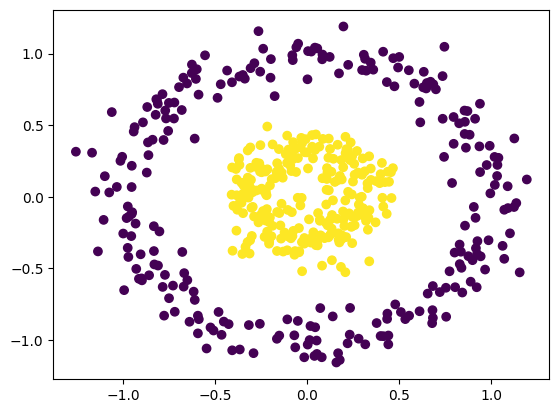

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle

# Let's generate a scatter plot composed of two circles
# The cloud contains 500 observations (`n_samples`) noisy by
# a Gaussian noise of standard deviation 0.1 (`noise`).
# The ratio between the radius of the small circle and the large circle
# is 0.3 (`factor`).
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)

print(data.shape)
# Random permutation of the rows of the matrix (the observations are mixed)
data, labels = shuffle(data, labels)

# Point cloud display
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [ ]:
####Question 1: How many groups does this dataset have?
# Answer: This dataset has two clusters or groups.

############################################################################################

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, n_init=10).fit(data)
kmeans.cluster_centers_

array([[-0.04420409, -0.42548044],
       [ 0.04505082,  0.4271275 ]])

In [11]:
kmeans.labels_

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

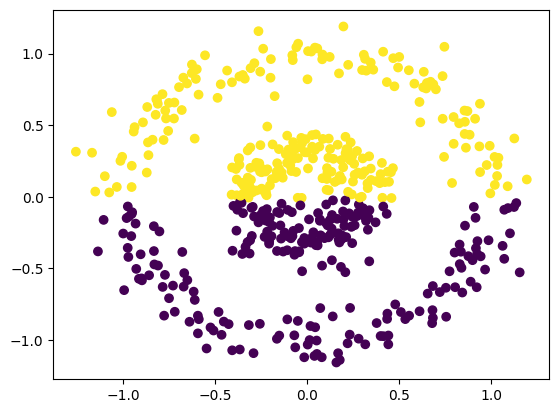

In [27]:
pred = kmeans.fit_predict(data) 
plt.scatter(data[:,0], data[:,1], c=pred) 
plt.show()

In [ ]:
####Question 2:Perform a clustering of this dataset using k-means. 
# What can we expect? What do you notice?
# Answer: We expected to partition 500 observations into 2 clusters, 
# in which each observation belongs to the cluster with the nearest mean 
# (cluster centers or cluster centroid), but the result was totally different. 
# I performed the k-means algorithm on the dataset, 
# but it could not predict the data correctly because of incorrect clustering.

###############################################################################################

In [ ]:
#DBSCAN

In [4]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

In [ ]:
####Question 3: What are the default values for important DBSCAN parameters in scikit-learn (ε and m)?
#   ε:eps  ====> default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other. 
# This is not a maximum bound on the distances of points within a cluster. 
#   m:min_samples ====>  default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# This includes the point itself.

############################################################################################

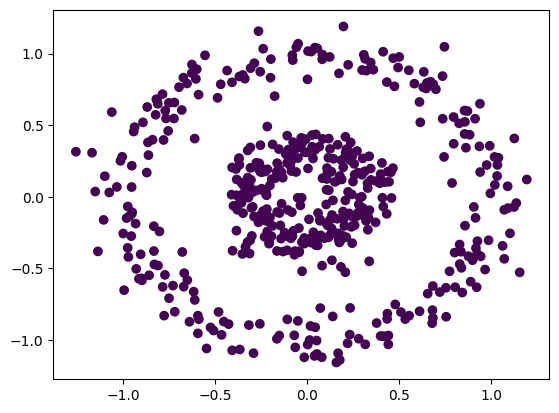

In [29]:
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

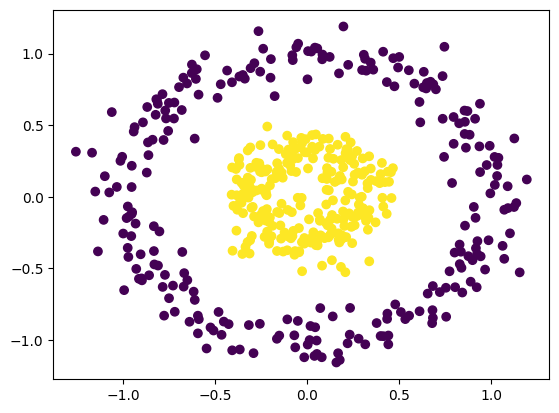

In [96]:
db = DBSCAN(eps=0.19, min_samples=20).fit(data)
predictions = db.fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

In [97]:
####Question 4: What do you notice? 
# On what parameter is it probably necessary to play to improve this result?
# I realized that the clustering for the DBSCAN  was poor and that it was unable to distinguish
# between the data in two separate groups when I saw the result on the plot.
# While the parameter min_samples primarily controls how tolerant the algorithm is towards noise
# (on noisy and large data sets it may be desirable to increase this parameter), 
# the parameter eps is crucial to choose appropriately for the data set and distance function 
# and usually cannot be left at the default value. 
# It controls the local neighborhood of the points. 
# When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”).
# When chosen too large, it causes close clusters to be merged into one cluster, 
# and eventually the entire data set to be returned as a single cluster. 
# For getting the best result, I decreased the eps from 0.5 to 0.19
# min_sample is equal to 20. The last and best clustering has shown above.

In [50]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=4).fit(data)
distances, _ = nn.kneighbors(data)
_
# You can see output of indices(which points are close to eachother):

array([[  0,  31, 336, 376],
       [  1, 489, 461, 328],
       [  2, 358, 288,  55],
       ...,
       [497,  38,  57, 147],
       [498,  33, 400, 329],
       [499, 368, 108, 253]], dtype=int64)

In [51]:
distances
# You can see distances among nearest points in output.

array([[0.        , 0.03931939, 0.04388711, 0.04808549],
       [0.        , 0.04809514, 0.0653732 , 0.0861943 ],
       [0.        , 0.08928635, 0.11142196, 0.12185993],
       ...,
       [0.        , 0.11427791, 0.16326355, 0.17430737],
       [0.        , 0.09154684, 0.10016227, 0.10047366],
       [0.        , 0.09094434, 0.12646665, 0.12836197]])

In [52]:
nn.kneighbors_graph(data).toarray()
# The output is  a sparse graph showing the connections between neighboring points

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Question 5: Using the NearestNeighbours documentation in scikit-learn, 
# explain what the code above does?
# This code finds the nearest neighbors between two sets of data.
# In k-NN classification, the output is a class membership. 
# An object is classified by a plurality vote of its neighbors, 
# with the object being assigned to the class most common among its k nearest neighbors 
# (k is a positive integer, typically small). If k = 1, then the object is simply assigned to 
# the class of that single nearest neighbor. In our code k=4 so it put 4 nearest neighbors 
# in one cluster. 

######The code in details:
# nn = NearestNeighbors(n_neighbors=4).fit(data): Fit the nearest neighbors estimator from the training dataset.
# n_neighbors:Number of neighbors to use by default for kneighbors queries.

# distances, _ = nn.kneighbors(data) : It gets distance and indices of the points from this class.
# kneighbors([X, n_neighbors, return_distance]): Find the K-neighbors of a point.

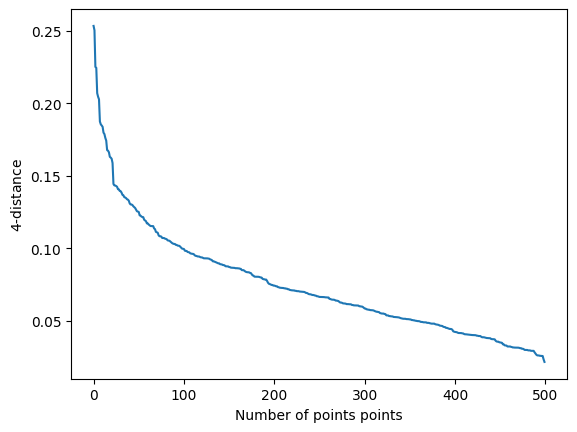

In [47]:
distances_triees = np.sort(distances[:,-1])[::-1]
plt.plot(distances_triees)
plt.xlabel("Number of points points")
plt.ylabel("$4$-distance")
plt.show()

In [94]:
# Question 6: From the 4-distance graph, determine the appropriate eps value for this dataset 
# using the current view heuristic. Reapply DBSCAN with these settings. 
# Display the resulting point cloud.

#### Answer: optimized eps values are: (eps: 0.21, min_sample=5) , (eps=0.19, min_samples=20), 
# and other points on curve in the graph with below criteria. 
# (The points with this criteria: 0.12<4-distances<0.21 && 3<Numbers of points points<25)
# You can see the result in the next new plot with this parameter.

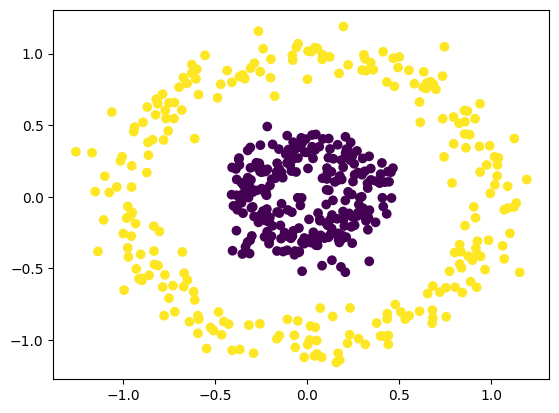

In [95]:
db = DBSCAN(eps=0.21,min_samples=5).fit(data)
predictions = db.fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

In [ ]:
# Question 7: How many groups do you get? What are observations with label -1?
# We have two different clusters, or groups. The observation with label -1 is noise. 
# I specified parameters that do not have any noise in the output plot.

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [ ]:
#### Question 8: How many observations does this dataset contain?
# This dataset includes 150 instances(50 in each of three classes).

In [ ]:
####Question 9: Perform a principal component analysis and visualize the Iris dataset projected 
# along its first two principal axes.

In [5]:
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))

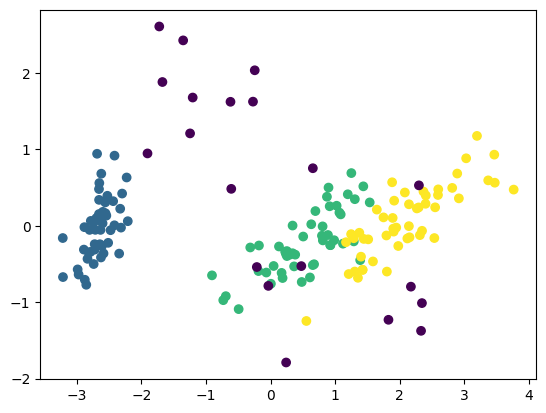

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y) and plt.show()

In [ ]:
####Question 10: Apply automatic classification using DBSCAN 
# (work on 4-dimensional data, not projected data!). 
# Visualize the groups obtained in the main plan. 
# Compare this result to the partitioning obtained using a k-means.
##Answer: The result from codes,
#The score for DBSCAN is: 0.5789316063519963
#The score for Kmeans is: 0.5894923604314108
#In my codes Kmeans has better score because of my parameters. 
#We will get better result if we change eps and min_sample for DBSCAN.   


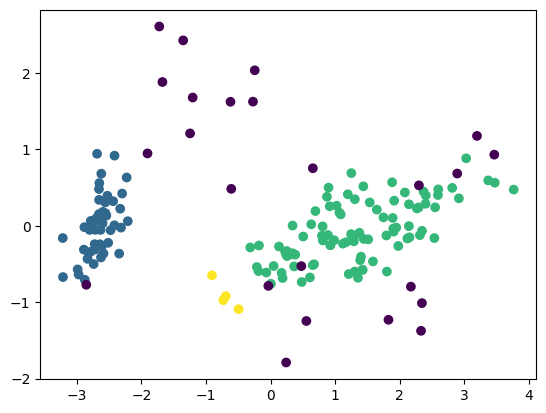

The score for DBSCAN is: 0.5789316063519963


In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
db = DBSCAN(eps=0.6,min_samples=4).fit(X)
y1 = db.fit_predict(X)
#plt.scatter(X[:,0], X[:,1], c=y)
#plt.show()
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X)
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=y1) and plt.show()
score = adjusted_rand_score(y1, y)
print('The score for DBSCAN is:', score)

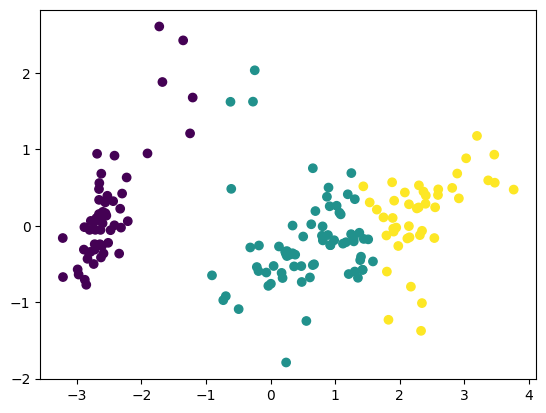

The score for Kmeans is: 0.5894923604314108


In [10]:
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)
y2 = kmeans.fit_predict(X) 
#plt.scatter(X[:,0], X[:,1], c=pred) 
#plt.show()
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X)
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=y2) and plt.show()
score = adjusted_rand_score(y2, y)
print('The score for Kmeans is:', score)

In [ ]:
### Question 11: Using the functions of sklearn.metrics, calculate the good detection rate of outliers.
# Up to what proportion of noisy data is the partitioning obtained by DBSCAN robust?
### Answer: The accuracy_score function computes the accuracy, either the fraction (default)
# or the count (normalize=False) of correct predictions.In multilabel classification, 
# the function returns the subset accuracy. 
# If the entire set of predicted labels for a sample strictly match with the true set of labels,
# then the subset accuracy is 1.0; otherwise it is 0.0. For our model accuracy was 0.67 that shows
#  67/100 noisy data has obtained by prediction of DBSCAN. 

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y1)

0.6705882352941176